# David Catá y su música

## Authentication and initializing the API

Save your client ID and your client secret in your preferred way, and read it or load it into the following variables:

In [107]:
CLIENT_ID = "4109b2d9f5014671863bb2df1d1fbdd3"
CLIENT_SECRET = "5cb719fae80c4191a9c0b288f51bfe50"

In [108]:
# If you havent done so, install the spotipy wrapper
!pip install spotipy --upgrade

Once you have done it, we will start initializing the API.

In [109]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [110]:

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))


## Creamos funciones para extraer la información sobre el artista

In [111]:
# ID de David Catá en Spotify
id_artista = '6PXw89KOEkWsfVv3ioubfi'

# Obtener las canciones más populares de David Catá
def obtener_canciones_populares_artista(id_artista, limite=10):
    top_tracks = sp.artist_top_tracks(id_artista)
    canciones_ids = [track['id'] for track in top_tracks['tracks'][:limite]]
    
    # Obtener detalles de cada canción
    detalles_canciones = [obtener_detalles_cancion(id_cancion) for id_cancion in canciones_ids]
    
    # Crear DataFrame
    df = pd.DataFrame(detalles_canciones)
    return df

# Función para obtener detalles de una canción
def obtener_detalles_cancion(id_cancion):
    track = sp.track(id_cancion)
    audio_features = sp.audio_features(id_cancion)[0]
    
    detalles = {
        'id': track['id'],
        'nombre': track['name'],
        'artistas': ', '.join([artist['name'] for artist in track['artists']]),
        'album': track['album']['name'],
        'fecha_lanzamiento': track['album']['release_date'],
        'duracion_ms': track['duration_ms'],
        'popularidad': track['popularity'],
        'preview_url': track['preview_url'],
        'acousticness': audio_features['acousticness'],
        'danceability': audio_features['danceability'],
        'energy': audio_features['energy'],
        'instrumentalness': audio_features['instrumentalness'],
        'liveness': audio_features['liveness'],
        'loudness': audio_features['loudness'],
        'speechiness': audio_features['speechiness'],
        'tempo': audio_features['tempo'],
        'valence': audio_features['valence']
    }
    
    return detalles

# Obtener DataFrame con las canciones más populares de David Catá
df_canciones = obtener_canciones_populares_artista(id_artista, limite=10)

# Mostrar el DataFrame
df_canciones.head()


,id,nombre,artistas,album,fecha_lanzamiento,duracion_ms,popularidad,preview_url,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1wH0tiaLdUPzbmh2ZrQlgc,Presentimiento,"David Catá, David Rodríguez Casas",ORIGEN,2022-12-02,247905,4,https://p.scdn.co/mp3-preview/6fb46d03e94f2d37...,0.524,0.155,0.2490,0.697,0.0807,-13.152,0.0345,156.070,0.1180
1,1iDvN8Bj7fzJeO2ZQd0zEa,En la piel,"David Catá, David Rodríguez Casas",ORIGEN,2022-12-02,339619,0,https://p.scdn.co/mp3-preview/6c8f1277eb9c4d13...,0.472,0.437,0.2700,0.859,0.0847,-11.781,0.0272,82.952,0.1010
2,38ew94pokECd9ANCUiCziS,Bajo mi piel,"David Catá, David Rodríguez Casas, Q-Art Ensemble",ORIGEN,2022-12-02,216958,1,https://p.scdn.co/mp3-preview/be23a64acd9fbca8...,0.422,0.415,0.2880,0.849,0.0910,-9.287,0.0300,111.645,0.2230
3,5epgL9L6Vk1zNS1fVHAEhr,Inflexión,"David Catá, David Rodríguez Casas, Q-Art Ensemble",ORIGEN,2022-12-02,154026,1,https://p.scdn.co/mp3-preview/74790ca68db62dc9...,0.826,0.352,0.3590,0.861,0.1220,-10.733,0.0314,139.924,0.1510
4,1WrMwgGVDpUwvPo6n40KZd,Una rosa de papel,David Catá,Una rosa de papel,2024-08-16,180000,1,https://p.scdn.co/mp3-preview/aa725088f2faef44...,0.988,0.494,0.0548,0.907,0.0862,-22.132,0.0486,133.779,0.0793


<h3>El DataFrame df_canciones contendrá la siguiente información para cada canción:</h3>

<p>id: ID de la canción en Spotify.</p>
<p>nombre: Nombre de la canción.</p>
<p>artistas: Nombre(s) del/de los artista(s).</p>
<p>album: Nombre del álbum al que pertenece la canción.</p>
<p>fecha_lanzamiento: Fecha de lanzamiento del álbum.</p>
<p>duracion_ms: Duración de la canción en milisegundos.</p>
<p>popularidad: Un valor entre 0 y 100 que indica la popularidad de la canción.</p>
<p>preview_url: URL de una muestra de 30 segundos de la canción.</p>
<p>acousticness: Medida de lo acústica que es la canción (0.0 a 1.0).</p>
<p>danceability: Medida de lo bailable que es la canción (0.0 a 1.0).</p>
<p>energy: Medida de la energía de la canción (0.0 a 1.0).</p>
<p>instrumentalness: Medida de cuán instrumental es la canción (0.0 a 1.0).</p>
<p>liveness: Medida de la probabilidad de que la canción se grabó en vivo (0.0 a 1.0).</p>
<p>loudness: Volumen general de la pista en decibelios.</p>
<p>speechiness: Medida de la cantidad de palabras habladas en la canción (0.0 a 1.0).</p>
<p>tempo: Tempo estimado de la canción en pulsaciones por minuto (BPM).</p>
<p>valence: Medida de la musicalidad de la canción, de lo positivo o negativo que suena (0.0 a 1.0).</p>

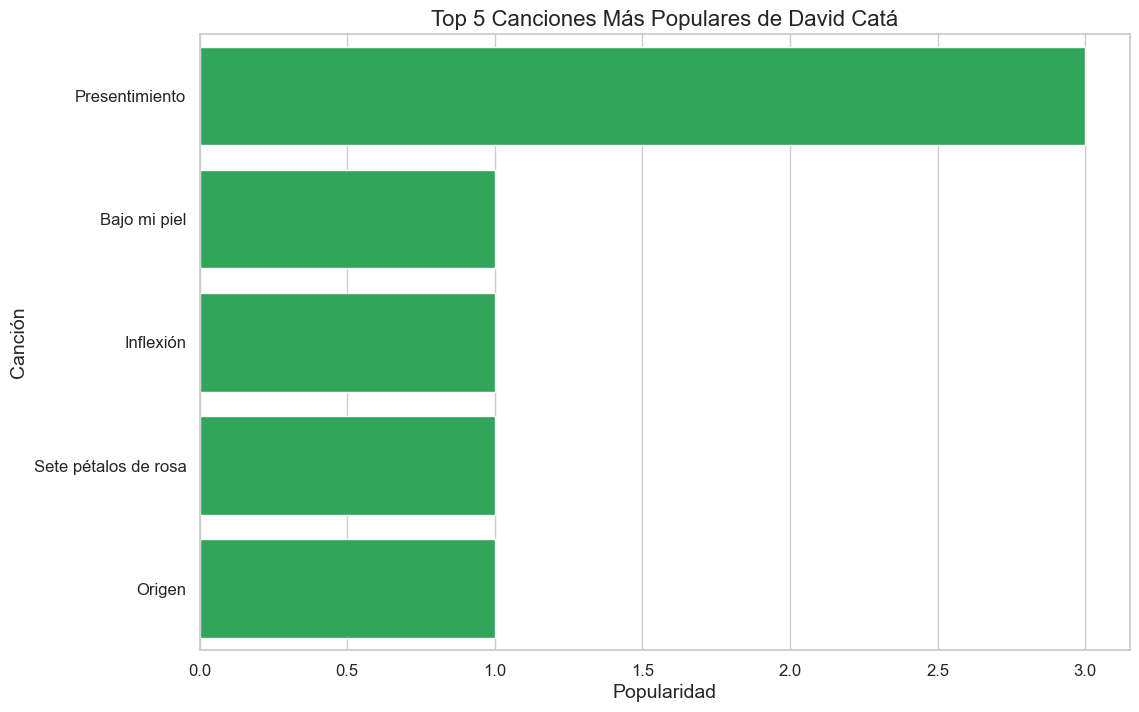

In [112]:
# Filtrar las 5 canciones con más popularidad
spotify_green = "#1DB954"

plt.figure(figsize=(12, 8))
sns.barplot(x='popularidad', y='nombre', data=df_top5, color=spotify_green)

# Agregar título y etiquetas
plt.title('Top 5 Canciones Más Populares de David Catá', fontsize=16)
plt.xlabel('Popularidad', fontsize=14)
plt.ylabel('Canción', fontsize=14)

# Ajuste de texto para asegurar que los nombres se vean claramente
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()


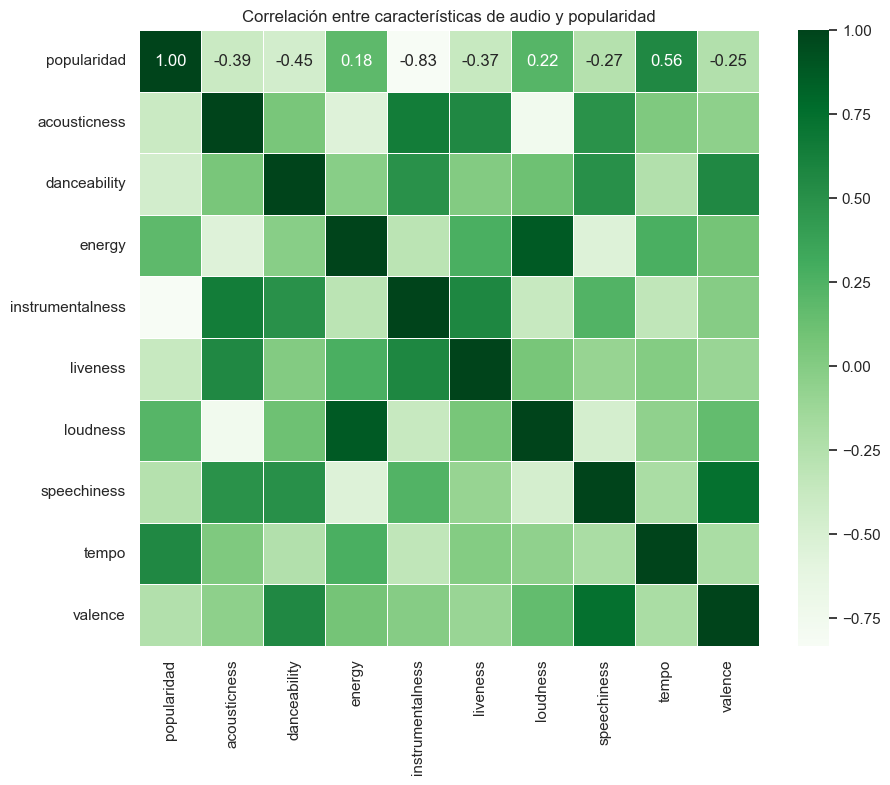

In [113]:
# Gráfico 2: Correlación entre características de audio y popularidad
plt.figure(figsize=(10, 8))
sns.heatmap(df_canciones[['popularidad', 'acousticness', 'danceability', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre características de audio y popularidad')
plt.show()

In [115]:
# Obtener discografía completa (álbumes y singles)
albums = sp.artist_albums(id_artista, album_type='album,single', limit=50)['items']

# Extraer detalles de los álbumes
album_data = []
for album in albums:
    album_info = {
        'nombre_album': album['name'],
        'fecha_lanzamiento': album['release_date'],
        'total_tracks': album['total_tracks'],
        'id_album': album['id']
    }
    album_data.append(album_info)

# Convertir a DataFrame
df_albums = pd.DataFrame(album_data)
df_albums.sort_values(by='fecha_lanzamiento', ascending=True, inplace=True)

# Mostrar el DataFrame con los álbumes
df_albums.head()

,nombre_album,fecha_lanzamiento,total_tracks,id_album
3,Presentimiento,2022-11-10,1,1EQeKG6ULz1arQdXwKtsrM
2,EN LA PIEL,2022-11-24,1,2zNfrceYXm6Ai4LuKkx1DT
0,ORIGEN,2022-12-02,12,5G7IYO998olKkyliC0bEht
1,Una rosa de papel,2024-08-16,1,2N5UFXZyWdWRlyTkWlXhyW


In [116]:
# Obtener características de audio para todas las canciones en los álbumes
audio_features = []

for album_id in df_albums['id_album']:
    tracks = sp.album_tracks(album_id)['items']
    track_ids = [track['id'] for track in tracks]
    features = sp.audio_features(track_ids)
    
    for feature in features:
        if feature:
            track_info = {
                'id_cancion': feature['id'],
                'nombre_cancion': [track['name'] for track in tracks if track['id'] == feature['id']][0],
                'album': [album['name'] for album in albums if album['id'] == album_id][0],
                'danceability': feature['danceability'],
                'energy': feature['energy'],
                'valence': feature['valence'],
                'tempo': feature['tempo'],
                'duration_ms': feature['duration_ms'],
                'acousticness': feature['acousticness'],
                'instrumentalness': feature['instrumentalness'],
                'liveness': feature['liveness'],
                'speechiness': feature['speechiness'],
                'loudness': feature['loudness']
            }
            audio_features.append(track_info)

# Convertir a DataFrame
df_audio_features = pd.DataFrame(audio_features)

# Mostrar el DataFrame con las características de audio
df_audio_features.head()


,id_cancion,nombre_cancion,album,danceability,energy,valence,tempo,duration_ms,acousticness,instrumentalness,liveness,speechiness,loudness
0,4dkBNcsncjRDCNbP7fvgvA,Presentimiento,Presentimiento,0.155,0.2490,0.1180,156.070,247906,0.524,0.697,0.0807,0.0345,-13.152
1,72HXS6f14Ci4YD2ZLb6fDR,EN LA PIEL,EN LA PIEL,0.437,0.2700,0.1010,82.952,339619,0.472,0.859,0.0847,0.0272,-11.781
2,1ceoA14xwjx2V1kc15Un5I,Origen,ORIGEN,0.483,0.2940,0.0577,120.007,158116,0.822,0.930,0.1220,0.0312,-10.982
3,2p1o1mrEGwB2SEASechpyZ,Un día gris,ORIGEN,0.330,0.0929,0.1120,60.164,163535,0.983,0.937,0.1110,0.0449,-18.946
4,3mzXGAbWOWOk3hbXsuPGnX,Sete pétalos de rosa,ORIGEN,0.170,0.2000,0.1560,82.796,203666,0.741,0.815,0.0986,0.0368,-13.596


In [117]:
# Obtener características de audio para todas las canciones en los álbumes
audio_features = []

for album_id in df_albums['id_album']:
    tracks = sp.album_tracks(album_id)['items']
    track_ids = [track['id'] for track in tracks]
    features = sp.audio_features(track_ids)
    
    for feature in features:
        if feature:
            track_info = {
                'id_cancion': feature['id'],
                'nombre_cancion': [track['name'] for track in tracks if track['id'] == feature['id']][0],
                'album': [album['name'] for album in albums if album['id'] == album_id][0],
                'danceability': feature['danceability'],
                'energy': feature['energy'],
                'valence': feature['valence'],
                'tempo': feature['tempo'],
                'duration_ms': feature['duration_ms'],
                'acousticness': feature['acousticness'],
                'instrumentalness': feature['instrumentalness'],
                'liveness': feature['liveness'],
                'speechiness': feature['speechiness'],
                'loudness': feature['loudness']
            }
            audio_features.append(track_info)

# Convertir a DataFrame
df_audio_features = pd.DataFrame(audio_features)

# Mostrar el DataFrame con las características de audio
df_audio_features.head()


,id_cancion,nombre_cancion,album,danceability,energy,valence,tempo,duration_ms,acousticness,instrumentalness,liveness,speechiness,loudness
0,4dkBNcsncjRDCNbP7fvgvA,Presentimiento,Presentimiento,0.155,0.2490,0.1180,156.070,247906,0.524,0.697,0.0807,0.0345,-13.152
1,72HXS6f14Ci4YD2ZLb6fDR,EN LA PIEL,EN LA PIEL,0.437,0.2700,0.1010,82.952,339619,0.472,0.859,0.0847,0.0272,-11.781
2,1ceoA14xwjx2V1kc15Un5I,Origen,ORIGEN,0.483,0.2940,0.0577,120.007,158116,0.822,0.930,0.1220,0.0312,-10.982
3,2p1o1mrEGwB2SEASechpyZ,Un día gris,ORIGEN,0.330,0.0929,0.1120,60.164,163535,0.983,0.937,0.1110,0.0449,-18.946
4,3mzXGAbWOWOk3hbXsuPGnX,Sete pétalos de rosa,ORIGEN,0.170,0.2000,0.1560,82.796,203666,0.741,0.815,0.0986,0.0368,-13.596


In [118]:
# Obtener la popularidad de las canciones
popularity_data = []

for album_id in df_albums['id_album']:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_info = {
            'id_cancion': track['id'],
            'nombre_cancion': track['name'],
            'popularidad': sp.track(track['id'])['popularity'],
            'album': df_albums[df_albums['id_album'] == album_id]['nombre_album'].values[0]
        }
        popularity_data.append(track_info)

# Convertir a DataFrame
df_popularity = pd.DataFrame(popularity_data)
df_popularity.sort_values(by='popularidad', ascending=False, inplace=True)

# Mostrar el DataFrame con la popularidad de las canciones
df_popularity.head()


,id_cancion,nombre_cancion,popularidad,album
0,4dkBNcsncjRDCNbP7fvgvA,Presentimiento,5,Presentimiento
9,1wH0tiaLdUPzbmh2ZrQlgc,Presentimiento,4,ORIGEN
2,1ceoA14xwjx2V1kc15Un5I,Origen,1,ORIGEN
4,3mzXGAbWOWOk3hbXsuPGnX,Sete pétalos de rosa,1,ORIGEN
5,38ew94pokECd9ANCUiCziS,Bajo mi piel,1,ORIGEN


In [119]:
# Obtener artistas relacionados
related_artists = sp.artist_related_artists(id_artista)

# Extraer detalles de los artistas relacionados
related_artists_data = []
for artist in related_artists['artists']:
    artist_info = {
        'nombre': artist['name'],
        'popularidad': artist['popularity'],
        'géneros': artist['genres'],
        'seguidores': artist['followers']['total'],
        'id_artista': artist['id']
    }
    related_artists_data.append(artist_info)

# Convertir a DataFrame
df_related_artists = pd.DataFrame(related_artists_data)

# Mostrar el DataFrame con los artistas relacionados
df_related_artists.head()


,nombre,popularidad,géneros,seguidores,id_artista
0,David Rodríguez Casas,2,[],29,3OPFDPmVaZrZoSsDq72JPo
1,Fillas de Cassandra,42,[],19688,4OETSqPg52NUKHEQEroph5
2,Guadi Galego,30,"[galego, spanish folk]",13359,4qiV7esJIt796GLcTRO0a4
3,Lontreira,30,[galego],3100,69j5CzSpVSX4LHgFP6xAkM
4,Mondra,33,[galego],5695,7hETI0LkHsxAb0Mil6OCWx
